In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image

sys.path.append("..")

plt.style.use('ggplot')
print(tf.__version__)

1.14.0


In [2]:
!ls

events.out.tfevents.1567048182.reljod  tennis_classifier.h5   Untitled.ipynb
events.out.tfevents.1567049246.reljod  TensorFlow_Core.ipynb


In [3]:
model = tf.keras.models.load_model("tennis_classifier.h5")
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 15, 20, 1280)      2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)     

In [4]:
test_dir = "../datasets/tennisballs/test"
test_dir

'../datasets/tennisballs/test'

In [5]:
def listdir(d):
    return [os.path.join(d, x) for x in os.listdir(d)]

In [6]:
test = listdir(test_dir)
test[:10]

['../datasets/tennisballs/test/empty6.jpg',
 '../datasets/tennisballs/test/empty74.jpg',
 '../datasets/tennisballs/test/ball542.jpg',
 '../datasets/tennisballs/test/empty497.jpg',
 '../datasets/tennisballs/test/ball129.jpg',
 '../datasets/tennisballs/test/empty99.jpg',
 '../datasets/tennisballs/test/empty54.jpg',
 '../datasets/tennisballs/test/empty146.jpg',
 '../datasets/tennisballs/test/empty21.jpg',
 '../datasets/tennisballs/test/empty225.jpg']

In [7]:
def show_image(title, *ind):
    for ind in ind:
        img = Image.open(test[ind])
        plt.imshow(img)
        plt.title(title)
        plt.axis("off")
        plt.grid(False)
        plt.show()

In [8]:
def predict_img(*ind):
    for ind in ind:
        image = Image.open(test[ind])
        image = np.asarray(image, dtype=np.float32)
        image = image * 1./255
        image = np.expand_dims(image, axis=0)
        pred = model.predict(image)
        sq_pred = np.squeeze(pred)
        if sq_pred < 0.5:
            title = "Has Ball"
        elif sq_pred > 0.5:
            title = "No Ball"
        else:
            title = "Undecided"
        show_image(title, ind)

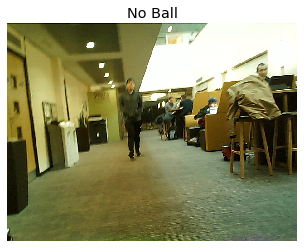

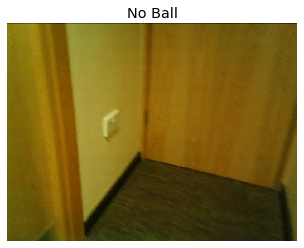

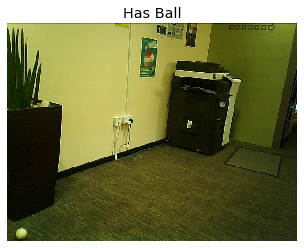

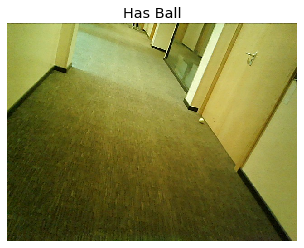

In [9]:
predict_img(24, 25, 26, 27)

In [10]:
import cv2
cv2.__version__

'4.1.1'

In [33]:
def convert_to_numpy_image(image):
    image = np.asarray(image, dtype=np.float32)
    image /= 255.0
    return np.expand_dims(image, axis=0)

def convert_prediction_to_class(pred):
    pred = np.squeeze(pred)
    if pred < 0.4:
        return "Has Tennis Ball:  {:2f}%".format((1-pred)*100)
    else:
        return "No Tennis Ball:  {:2f}%".format((1-pred)*100)

In [43]:
video = cv2.VideoCapture("/home/reljod/Documents/YURO/TENNIS/VideoData/tennis0.mp4")
_, samp_frame = video.read()

height, width, channel = samp_frame.shape

while True:
    ret, frame = video.read()
    frame = cv2.resize(frame, (640, 480))
    if not ret:
        break
    
    np_frame = convert_to_numpy_image(frame)
    predicted = model.predict(np_frame)
    
    class_pred = convert_prediction_to_class(predicted)
    
    cv2.putText(frame, class_pred, (0,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
    cv2.imshow("Frame", frame)
    k = cv2.waitKey(1)
    if k == ord('q'):
        break
    
video.release()
cv2.destroyAllWindows()